In [5]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#tensorflow
import tensorflow as tf

#keras
import keras
from keras.models import Sequential
from keras.preprocessing import image,image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten

#using incepton v3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [6]:
#As here we are using inceptionV3 we need to resize all images as below.

imageSize = [224,224]
batchSize = 15
classLabels = 10

In [21]:
# load dataset

TrainDataset = "../.playground/train/"
TestDataset = "../.playground/test/"

In [8]:
#@title Model Development


In [9]:
#we are using inceptionV3 pre-trained model to train our model. As we need to define output layer based on our classlabels we need to remove it by setting inclide_top to false.
inception = InceptionV3(input_shape=imageSize + [3],
                    weights= "imagenet",
                    include_top = False)

87916544/87910968 [==============================] - 183s 2us/step


In [12]:
#for inner layers of inceptionV3 we no need to train them as they are all trained except the output layer whivh we already removed.
for layer in inception.layers:
  layer.trainable = False

In [13]:
x = Flatten()(inception.output)

In [14]:
#we will define the output layer as dense layer having softmax as activation as we are dealing with multi classification
outputLayer = Dense(classLabels, activation='softmax')(x)

In [15]:
 #so our final model is:

model = Model(inputs = inception.input, outputs = outputLayer)

In [ ]:
#summary() method provides info of the parameters of dense layer which we need to optimise for training the model. Here we have 512 010 parameters.
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [16]:
#@title Compile the model by adding optimiser,loss & metric


In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
#@title Data Augmentation and scaling


In [19]:
trainDataGenerator = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testDataGenerator = ImageDataGenerator(rescale = 1./255)

In [22]:
# training & validation data generators

trainingData = trainDataGenerator.flow_from_directory(TrainDataset,
                                                 target_size= (224,224),
                                                 batch_size = 15,
                                                 class_mode= 'categorical')

Found 160 images belonging to 10 classes.


In [23]:
validationData = testDataGenerator.flow_from_directory(TestDataset,target_size= (224,224),
                                                 batch_size = 15,
                                                 class_mode= 'categorical')

Found 40 images belonging to 10 classes.


In [24]:
#@title Fit the model


In [25]:
# TODO: Swap fit_generator to fit as it is deprecated
trainHistory= model.fit_generator(
    trainingData,
    validation_data=validationData,
    epochs=9,
    steps_per_epoch=len(trainingData),
    validation_steps=len(validationData)
)

C:\Users\HPS19\anaconda3\envs\comp530\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/9
11/11 [==============================] - 11s 676ms/step - loss: 12.1402 - accuracy: 0.1443 - val_loss: 9.5489 - val_accuracy: 0.5000
Epoch 2/9
11/11 [==============================] - 6s 494ms/step - loss: 5.1611 - accuracy: 0.6654 - val_loss: 1.8611 - val_accuracy: 0.7000
Epoch 3/9
11/11 [==============================] - 6s 508ms/step - loss: 1.1373 - accuracy: 0.8397 - val_loss: 1.9642 - val_accuracy: 0.8250
Epoch 4/9
11/11 [==============================] - 6s 512ms/step - loss: 0.7719 - accuracy: 0.9318 - val_loss: 1.8543 - val_accuracy: 0.8500
Epoch 5/9
11/11 [==============================] - 6s 493ms/step - loss: 0.1251 - accuracy: 0.9829 - val_loss: 1.6793 - val_accur

Best Validation Loss: 1.5584
Best Validation Accuracy: 0.8500


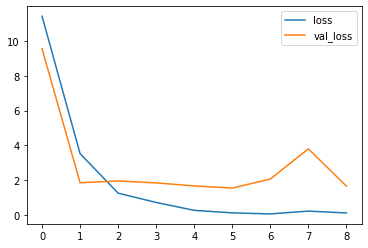

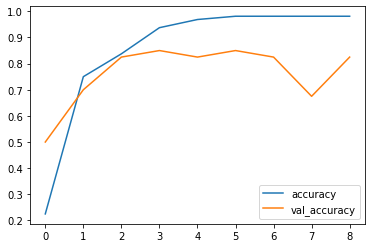

In [26]:
df = pd.DataFrame(trainHistory.history)
df.loc[:, ['loss', 'val_loss']].plot()
df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(df['val_loss'].min(), 
              df['val_accuracy'].max()))

In [28]:
#@title Test other than validation & train data
df

,loss,accuracy,val_loss,val_accuracy
0,11.409948,0.22500,9.548908,0.500
1,3.530954,0.75000,1.861124,0.700
2,1.265029,0.83750,1.964155,0.825
3,0.732425,0.93750,1.854293,0.850
4,0.280127,0.96875,1.679276,0.825
5,0.135687,0.98125,1.558380,0.850
6,0.075121,0.98125,2.073537,0.825
7,0.236895,0.98125,3.806146,0.675
8,0.130350,0.98125,1.668533,0.825


In [ ]:
model.save('model_inceptionV3.h5')

In [ ]:


# get the dictionary of classes
label2index = trainingData.class_indices

# obtain the list of classes
list_of_label = list(label2index.keys())
print("The list of classes: ", list_of_label)



The list of classes:  ['beetroot', 'coconut', 'corn', 'palm', 'potato', 'rice', 'soybean', 'sugarcane', 'sunflower', 'wood chip']


In [ ]:
img=image.load_img('/content/drive/MyDrive/datasets/test_dataset/palm/palm (20).jpg',target_size=(224,224))
x=image.img_to_array(img)
x=x/255

x=np.expand_dims(x,axis=0)
test_image=preprocess_input(x)

In [ ]:
predict = model.predict(test_image)

In [ ]:
a=int(np.argmax(predict, axis=1))

In [ ]:
a

3

In [ ]:
predictedlabel = list_of_label[a]

In [ ]:
predictedlabel

'palm'